# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt

# Active Mutagen AMES

In [30]:
#loading the file
active_meta=pd.read_csv('mutagen_AMES_1_values_Diverse_Final_june_2022.txt',sep='\t',header=None)
active_meta['Activity']=1
active_meta

,0,1,Activity
0,C=C(C)C=O,78-85-3Hansen_mutagen,1
1,CC=CC=O,4170-30-3Hansen_mutagen,1
2,C=CC1CO1,NOCAS_M159Hansen_mutagen,1
3,C=CC(=O)C,78-94-4Hansen_mutagen,1
4,CC(=O)C=O,78-98-8Hansen_mutagen,1
...,...,...,...
2826,CCCOc1cc(c2cc(OCCC)c(NN=C(C(=O)C)C(=O)Nc3ccc([...,336629-39-1Hansen_mutagen,1
2827,CCC1(O)CC(OC2CC(N(C)C)C(OC3CC(O)C(OC4CC(O)C(O)...,63710-10-1Hansen_mutagen,1
2828,Nc1ccc(N=Nc2ccc3cc(S(=O)(=O)O)c(N=Nc4ccc(Nc5cc...,6473-13-8Hansen_mutagen,1
2829,Cc1c(N)nc(C(CC(=O)N)NCC(N)C(=O)N)nc1C(=O)NC(C(...,NOCAS_M186Hansen_mutagen,1


In [31]:
#renaming columns
active_meta=active_meta.rename(columns={0:'Smiles', 1 :'Name'})
active_meta

,Smiles,Name,Activity
0,C=C(C)C=O,78-85-3Hansen_mutagen,1
1,CC=CC=O,4170-30-3Hansen_mutagen,1
2,C=CC1CO1,NOCAS_M159Hansen_mutagen,1
3,C=CC(=O)C,78-94-4Hansen_mutagen,1
4,CC(=O)C=O,78-98-8Hansen_mutagen,1
...,...,...,...
2826,CCCOc1cc(c2cc(OCCC)c(NN=C(C(=O)C)C(=O)Nc3ccc([...,336629-39-1Hansen_mutagen,1
2827,CCC1(O)CC(OC2CC(N(C)C)C(OC3CC(O)C(OC4CC(O)C(O)...,63710-10-1Hansen_mutagen,1
2828,Nc1ccc(N=Nc2ccc3cc(S(=O)(=O)O)c(N=Nc4ccc(Nc5cc...,6473-13-8Hansen_mutagen,1
2829,Cc1c(N)nc(C(CC(=O)N)NCC(N)C(=O)N)nc1C(=O)NC(C(...,NOCAS_M186Hansen_mutagen,1


# Inactive Mutagen AMES

In [32]:
#loading inactive AMES data
inactive_meta=pd.read_csv('non_mutagen_AMES_zero_values_Diverse_Final_june_2022.txt',sep='\t')
inactive_meta['Activity']=0
inactive_meta

,Smiles,Name,Activity
0,N#CCC#N,109-77-3Hansen_nonmutagen,0
1,C=C(C)C#N,126-98-7Hansen_nonmutagen,0
2,c1cc[nH]c1,109-97-7Hansen_nonmutagen,0
3,c1ccoc1,110-00-9Hansen_nonmutagen,0
4,c1c[nH]cn1,288-32-4Hansen_nonmutagen,0
...,...,...,...
2591,CCC[C@@H](C)C[C@H]([C@@H](C[C@H](C)CCCCCC[C@@H...,1892-charmaine_NON-mutagen,0
2592,O=C1c2c(cccc2)C(=O)c2c1ccc1c2[nH]c2c3C(=O)c4c(...,440-charmaine_NON-mutagen,0
2593,O=C(c1ccccc1)Nc1cccc2C(=O)c3c(ccc4c3[nH]c3c5C(...,4143-charmaine_NON-mutagen,0
2594,CC[C@H]1[C@@](C)([C@@H]([C@@H](C)C(=O)[C@H](C)...,1824-charmaine_NON-mutagen,0


# merging_all_datasets

In [33]:
#merging data
frames = [active_meta,inactive_meta]
mer_meta_data = pd.concat(frames)
mer_meta_data

,Smiles,Name,Activity
0,C=C(C)C=O,78-85-3Hansen_mutagen,1
1,CC=CC=O,4170-30-3Hansen_mutagen,1
2,C=CC1CO1,NOCAS_M159Hansen_mutagen,1
3,C=CC(=O)C,78-94-4Hansen_mutagen,1
4,CC(=O)C=O,78-98-8Hansen_mutagen,1
...,...,...,...
2591,CCC[C@@H](C)C[C@H]([C@@H](C[C@H](C)CCCCCC[C@@H...,1892-charmaine_NON-mutagen,0
2592,O=C1c2c(cccc2)C(=O)c2c1ccc1c2[nH]c2c3C(=O)c4c(...,440-charmaine_NON-mutagen,0
2593,O=C(c1ccccc1)Nc1cccc2C(=O)c3c(ccc4c3[nH]c3c5C(...,4143-charmaine_NON-mutagen,0
2594,CC[C@H]1[C@@](C)([C@@H]([C@@H](C)C(=O)[C@H](C)...,1824-charmaine_NON-mutagen,0


In [34]:
#merging na's
mer_meta_data= mer_meta_data.dropna().reset_index(drop=True)
mer_meta_data

,Smiles,Name,Activity
0,C=C(C)C=O,78-85-3Hansen_mutagen,1
1,CC=CC=O,4170-30-3Hansen_mutagen,1
2,C=CC1CO1,NOCAS_M159Hansen_mutagen,1
3,C=CC(=O)C,78-94-4Hansen_mutagen,1
4,CC(=O)C=O,78-98-8Hansen_mutagen,1
...,...,...,...
5422,CCC[C@@H](C)C[C@H]([C@@H](C[C@H](C)CCCCCC[C@@H...,1892-charmaine_NON-mutagen,0
5423,O=C1c2c(cccc2)C(=O)c2c1ccc1c2[nH]c2c3C(=O)c4c(...,440-charmaine_NON-mutagen,0
5424,O=C(c1ccccc1)Nc1cccc2C(=O)c3c(ccc4c3[nH]c3c5C(...,4143-charmaine_NON-mutagen,0
5425,CC[C@H]1[C@@](C)([C@@H]([C@@H](C)C(=O)[C@H](C)...,1824-charmaine_NON-mutagen,0


In [35]:
mer_meta_data = mer_meta_data.sample(frac=1).reset_index(drop=True)
mer_meta_data

,Smiles,Name,Activity
0,CC(C)CC1NC(=O)C(C)N(C)C(=O)CNC(=O)C(=Cc2ccccc2...,28540-82-1Hansen_nonmutagen,0
1,CCCCCCCC[S+]([O-])C(C)Cc1ccc2c(c1)OCO2,120-62-7Hansen_nonmutagen,0
2,CCOC(=O)N(CCCC(=O)c1cccnc1)N=O,68743-68-0Hansen_mutagen,1
3,ClCc1cccc2cc3ccc4cccc5ccc(c12)c3c45,86803-19-2Hansen_mutagen,1
4,c1ccc2c(c1)CCc1cc3ccc4c(c3cc21)CCCC4,16310-69-3Hansen_mutagen,1
...,...,...,...
5422,CCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2nc2ccc(OC)cc12,NOCAS_M11Hansen_mutagen,1
5423,Cc1ccc(cc1)Cl,746-charmaine_NON-mutagen,0
5424,C1NCCNC1,503-charmaine_NON-mutagen,0
5425,CCN(CCCl)CCCNc1c2c(nc3ccccc13)CCCC2,92280-01-8Hansen_mutagen,1


In [37]:
mer_meta_data_a=mer_meta_data[['Smiles','Activity']]
mer_meta_data_a

,Smiles,Activity
0,CC(C)CC1NC(=O)C(C)N(C)C(=O)CNC(=O)C(=Cc2ccccc2...,0
1,CCCCCCCC[S+]([O-])C(C)Cc1ccc2c(c1)OCO2,0
2,CCOC(=O)N(CCCC(=O)c1cccnc1)N=O,1
3,ClCc1cccc2cc3ccc4cccc5ccc(c12)c3c45,1
4,c1ccc2c(c1)CCc1cc3ccc4c(c3cc21)CCCC4,1
...,...,...
5422,CCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2nc2ccc(OC)cc12,1
5423,Cc1ccc(cc1)Cl,0
5424,C1NCCNC1,0
5425,CCN(CCCl)CCCNc1c2c(nc3ccccc13)CCCC2,1


In [38]:
#converting data to .smi files
mer_meta_data_a.to_csv('mer_meta_data.smi', sep='\t', index=False, header=False)


# fingerprints calcultion using PaDEL descriptors

In [44]:
data_meta=pd.read_csv('mer_meta_data_out.csv',sep=',')
data_meta

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5423,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5424,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5425,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data_meta= data_meta.dropna().reset_index(drop=True)
data_meta

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5423,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5424,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5425,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data = data_meta.drop('Name', axis=1)
target = data_meta['Name']

In [47]:
def remove_low_variance(input_data, threshold):
    """ it returns the new data after filtering but without column names.
    selection.get_support gives me column names  """
    from sklearn.feature_selection import VarianceThreshold
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

def runModel(data, target, thresholdVariance, colRetainedFilename, pickleFileName, algo):

    import pickle
    import scikitplot as skplt
    import matplotlib.pyplot as plt
    from xgboost.sklearn import XGBClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.model_selection import StratifiedKFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    
    
    data_clean = remove_low_variance(data, threshold=thresholdVariance)
    
    colsRetained = pd.DataFrame.from_dict({"ColsRetained" : data_clean.columns.tolist()})
    colsRetained.to_csv(colRetainedFilename, sep=";", index=False)
    
    X_train, X_test, y_train, y_test = train_test_split(data_clean, target, test_size=0.3, random_state=42,stratify=target)
    
    if algo == "rf":
        clf=RandomForestClassifier()
        param_grid = { 
            'n_estimators': range(100,500,10),
            'max_depth' : range(1,7,1),
            'random_state': [42] ,
            'criterion':["gini"],#, "entropy"],,
            'max_features':["auto"]#, "sqrt", "log2"] 
        }
    elif algo == "xgb":
        clf = XGBClassifier()
        param_grid = { 
            'n_estimators': range(5, 31, 5),
            'max_depth' : range(1,5,1),
            'random_state': [42] ,
            'learning_rate': [0.01],
            "objective":['binary:logistic']
        }        
    
    kfold = StratifiedKFold(n_splits=3)
    CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kfold, scoring="f1", verbose=1, n_jobs=-1)
    CV_clf.fit(X_train, y_train)

    print("Best Params : ")
    print(CV_clf.best_params_)
    
    if algo == "rf":
        clf1=RandomForestClassifier(**CV_clf.best_params_)
    elif algo == "xgb":
        clf1=XGBClassifier(**CV_clf.best_params_)
    clf1.fit(X_train, y_train)

    print("Save Model : ", pickleFileName)
    with open(pickleFileName,'wb') as f:
        pickle.dump(clf1,f)
    
    y_train_class = clf1.predict(X_train)
    y_test_class = clf1.predict(X_test)
    y_train_proba = clf1.predict_proba(X_train)
    y_test_proba = clf1.predict_proba(X_test)
    
    
    skplt.plotters.plot_roc_curve(y_train, y_train_proba, title="ROC - X_train")
    plt.show()
    skplt.plotters.plot_roc_curve(y_test, y_test_proba, title="ROC - X_test")
    plt.show()
    
    print("Accuracy Train : ", str(accuracy_score(y_train, y_train_class)))
    print("Accuracy Test : ", str(accuracy_score(y_test, y_test_class)))

    skplt.metrics.plot_confusion_matrix(y_train, y_train_class, title="X_train")
    skplt.metrics.plot_confusion_matrix(y_test, y_test_class, title="X_test")

    skplt.metrics.plot_confusion_matrix(y_train, y_train_class, normalize=True,
                                       title="X_train normalized")
    skplt.metrics.plot_confusion_matrix(y_test, y_test_class, normalize=True,
                                       title="X_test normalized")

    print("Classification Report - Train :")
    print(classification_report(y_train, y_train_class))
    print("Classification Report - Test :")
    print(classification_report(y_test, y_test_class))
    
    
    

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 110, 'random_state': 42}
Save Model :  AMES_data_pubchem_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


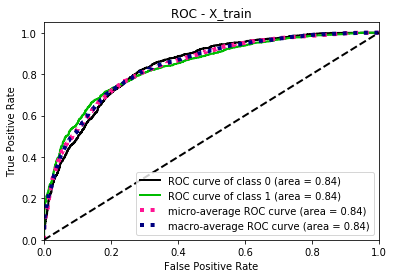

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


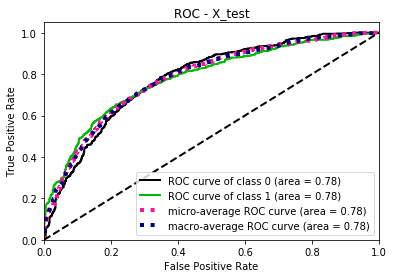

Accuracy Train :  0.7640863612427593
Accuracy Test :  0.7120933087783916
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      1817
           1       0.81      0.71      0.76      1981

    accuracy                           0.76      3798
   macro avg       0.77      0.77      0.76      3798
weighted avg       0.77      0.76      0.76      3798

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       779
           1       0.75      0.68      0.71       850

    accuracy                           0.71      1629
   macro avg       0.71      0.71      0.71      1629
weighted avg       0.72      0.71      0.71      1629



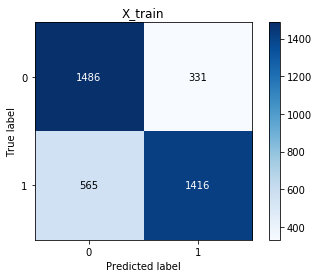

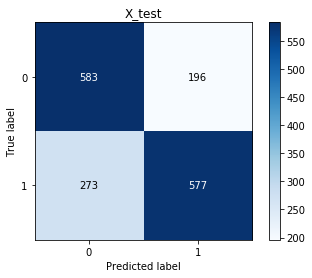

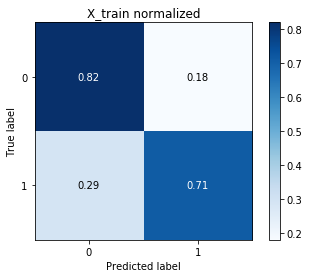

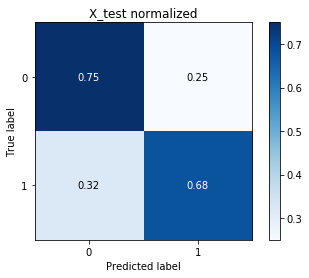

In [48]:
runModel(data, target, 0.1, 'AMES_pubchem_colsRetained_rf.csv', 'AMES_data_pubchem_rf.pkl', algo="rf")    

# Y Scrambling

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}
Save Model :  AMES_data_pubchem_yscram_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


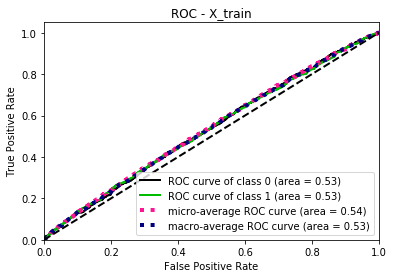

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


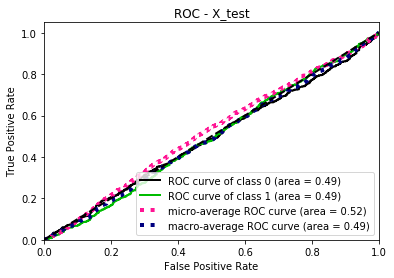

Accuracy Train :  0.5215903106898367
Accuracy Test :  0.521792510742787
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1817
           1       0.52      1.00      0.69      1981

    accuracy                           0.52      3798
   macro avg       0.26      0.50      0.34      3798
weighted avg       0.27      0.52      0.36      3798

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       779
           1       0.52      1.00      0.69       850

    accuracy                           0.52      1629
   macro avg       0.26      0.50      0.34      1629
weighted avg       0.27      0.52      0.36      1629



/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anacon

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 160, 'random_state': 42}
Save Model :  AMES_data_pubchem_yscram_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


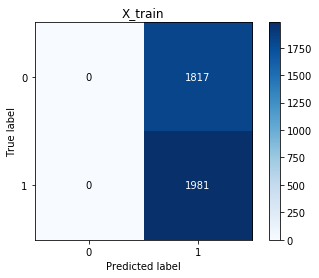

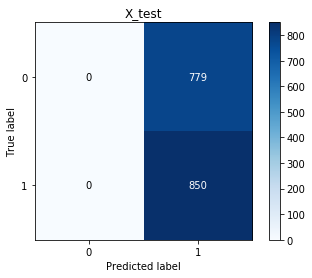

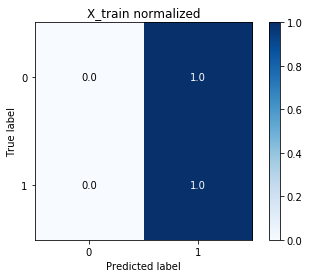

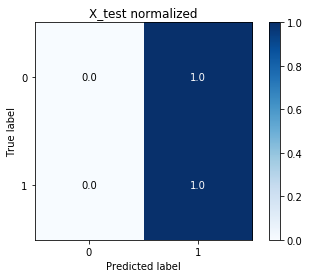

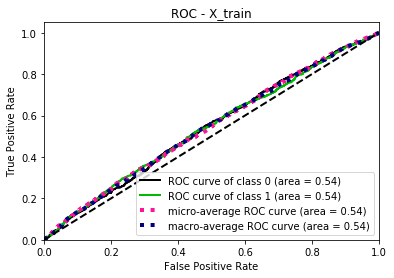

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


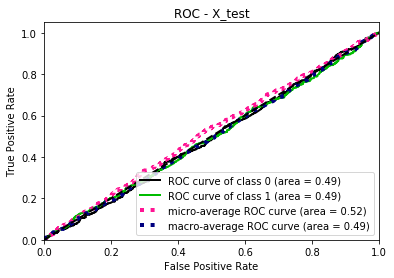

Accuracy Train :  0.5215903106898367
Accuracy Test :  0.521792510742787
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1817
           1       0.52      1.00      0.69      1981

    accuracy                           0.52      3798
   macro avg       0.26      0.50      0.34      3798
weighted avg       0.27      0.52      0.36      3798

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       779
           1       0.52      1.00      0.69       850

    accuracy                           0.52      1629
   macro avg       0.26      0.50      0.34      1629
weighted avg       0.27      0.52      0.36      1629



/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anacon

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 140, 'random_state': 42}
Save Model :  AMES_data_pubchem_yscram_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


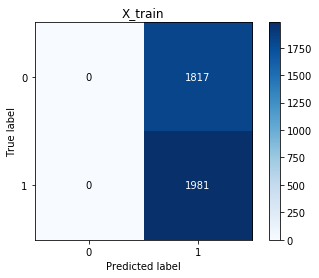

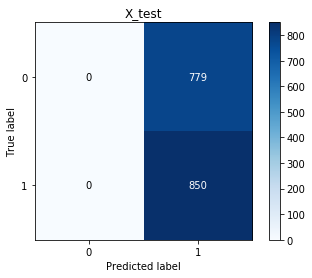

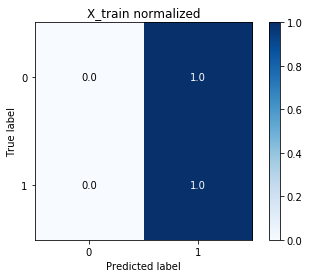

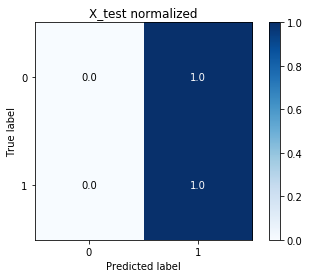

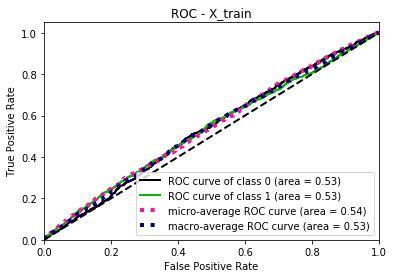

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


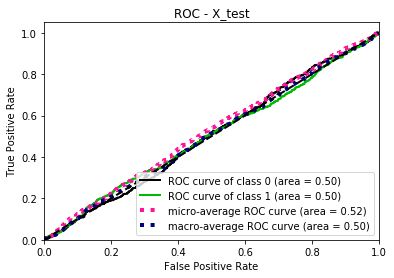

Accuracy Train :  0.5215903106898367
Accuracy Test :  0.521792510742787
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1817
           1       0.52      1.00      0.69      1981

    accuracy                           0.52      3798
   macro avg       0.26      0.50      0.34      3798
weighted avg       0.27      0.52      0.36      3798

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       779
           1       0.52      1.00      0.69       850

    accuracy                           0.52      1629
   macro avg       0.26      0.50      0.34      1629
weighted avg       0.27      0.52      0.36      1629



/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anacon

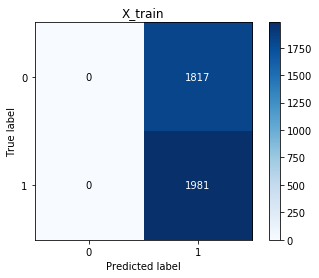

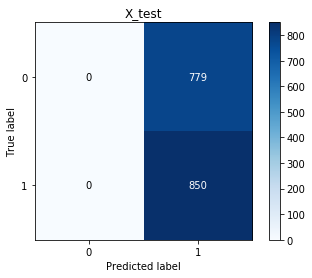

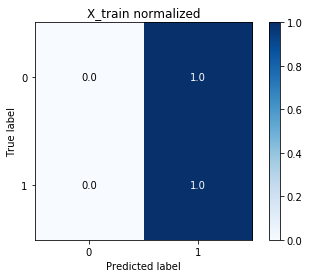

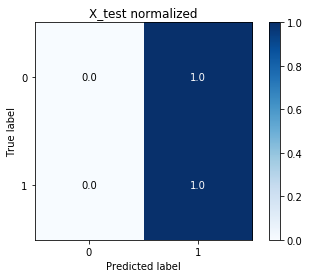

In [49]:
for _ in range(3):
    np.random.shuffle(target)
    runModel(data, target, 0.1, 'AMES_pubchem_yscram_colsRetained_rf.csv', 'AMES_data_pubchem_yscram_rf.pkl', algo="rf")    